# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Linus Schütte

Datum: 16.11.2023

Gruppe: 88

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

**Welche Wärmekapazität besitzt kaltes Wasser bei der Zumischung von der gleichen Menge warmes Wasser?**

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/capacity_1.jpg" width = 300>

<img src="figures/capacity_2.jpg" width=300>

## Versuchsauswertung

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
import h5py


from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


/home/jovyan/work/calorimetry_home


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [36]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_capacity = "/home/jovyan/work/calorimetry_home/experiment_capacity/20231116_calorimetry_88_Linus Schuette.h5"

# DONE #

In [38]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
with h5py.File(path_capacity, 'r') as f:
    capacity_data = f["RawData"]
    dataset_capacity = {}

    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key]

        # get Attributes
        attributes = dict(uuid_group.attrs)

        # get data
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['timestamp'][:]

        # store attributes and data in dict
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'timestamp': time_data
        }

# DONE #

#### (ii) Daten ploten

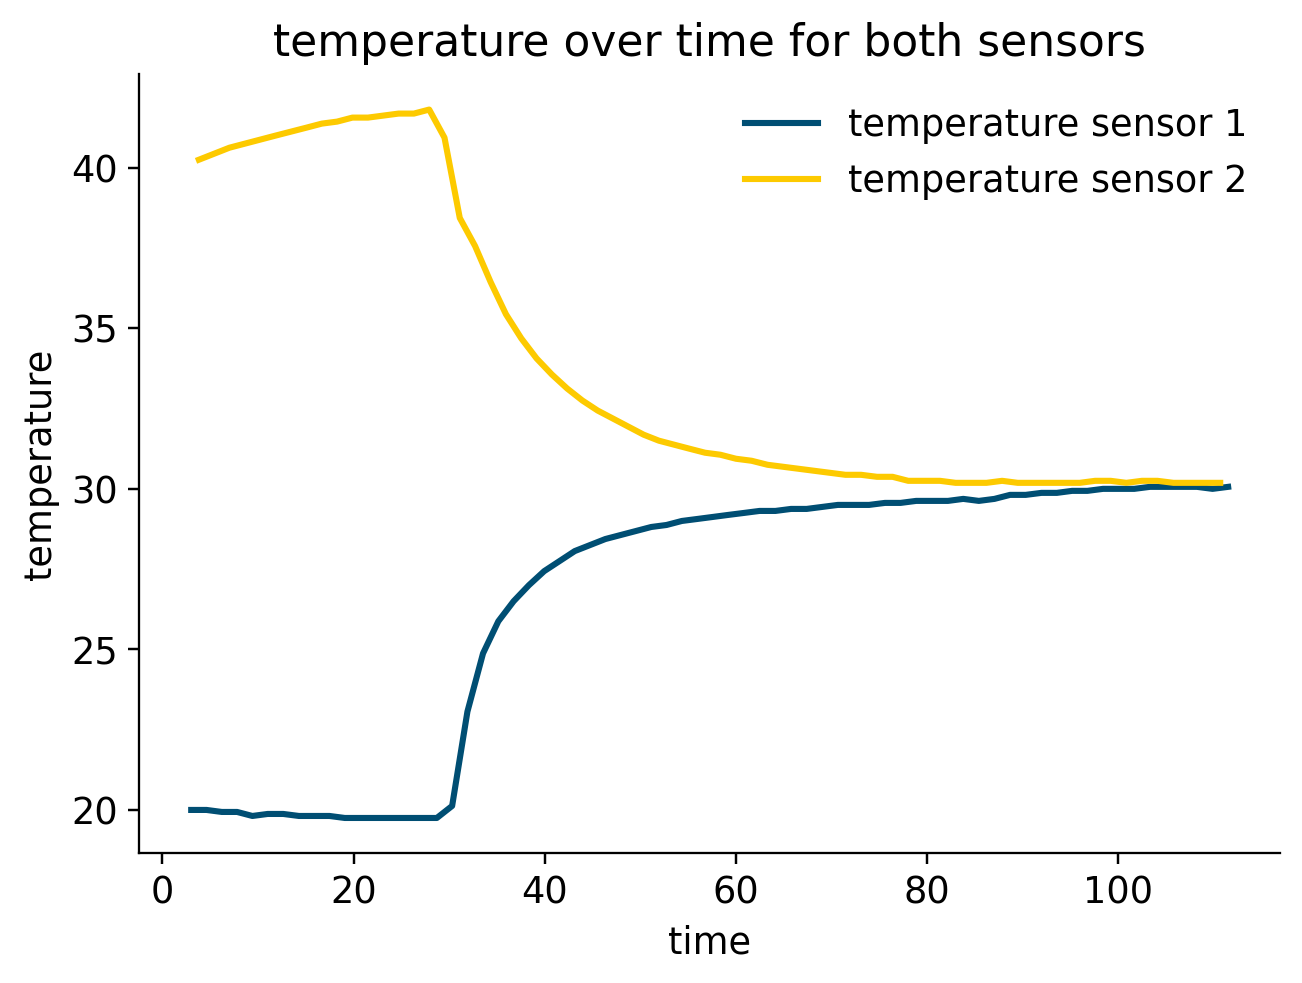

In [45]:
# TODO: Use the temperature and time data for plotting

# load data from uuid 1
uuid1_data = dataset_capacity['1ee7c938-9fb6-66f2-8838-b5a5e2b2cca4']
time_data_1 = uuid1_data['timestamp']
temperature_data_1 = uuid1_data['temperature']

#load data from uuid 2
uuid2_data = dataset_capacity['1ee7c939-604d-6fe1-9664-305bc2d59f16']
time_data_2 = uuid2_data['timestamp']
temperature_data_2 = uuid2_data['temperature']

# plot for uuid 1
plt.plot(time_data_1, temperature_data_1, label='temperature sensor 1', linewidth = 2)

# plot for uuid 2
plt.plot(time_data_2, temperature_data_2, label='temperature sensor 2', linewidth = 2)

# plot for both uuids
plt.xlabel('time')
plt.ylabel('temperature')
plt.title('temperature over time for both sensors')
plt.legend()
plt.show()

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [71]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
json_folder = "/home/jovyan/work/calorimetry_home/experiment_capacity/"
mass_water = m_json.get_json_entry(json_folder, "1ee7ce22-05b3-6e53-bcc6-8df96409561e", ['probe', 'metadata'])
print (mass_water)

# DONE #

mass_water = 0.25

Wassermasse 250 mL


#### (iV) Anfangs- und Endwert der Temperatur

In [72]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

# start and end temperature for sensor 1

start_temp_1 = temperature_data_1[0] 
end_temp_1 = temperature_data_1[-1] 

# start and end temperaturer for sensor 2

start_temp_2 = temperature_data_2[0] 
end_temp_2 = temperature_data_2[-1] 

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [80]:
# TODO: Calculate heat capacity of the calorimeter
#
m_add = mass_water
m_cup = m_add
T_2 = start_temp_2
T_1 = start_temp_1
T_M = end_temp_1


capacity = (m_add*water_heat_capa*(T_2-T_M))/(T_M-T_1) - m_cup*water_heat_capa


# DONE #

#### (Vi) Ergebnis

In [81]:
# TODO: Print result

print(capacity)

# DONE #

0.01298136645962722


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die berechnete Wärmekapazität meines Versuches beträgt 0.01298 kJkG/K. Es werden also 12 Joule Energie benötigt, um die Temperatur von 1 Kilogramm des Materials um 1 Kelvin zu erhöhen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch war nicht so spannend. Das Programmieren war eigentlich interresant, jedoch war der Zeitaufwand meiner Meinung leider zu hoch.